
Method A: Line Parameterization
Segments s_1 and s_2 intersect at point (3.00, 3.00)
Segments s_1 and s_3 intersect at point (4.00, 4.00)
Segments s_1 and s_6 intersect at point (5.00, 5.00)
Segments s_2 and s_4 intersect at point (3.00, 3.00)
Segments s_2 and s_9 intersect at point (5.00, 1.00)
Segments s_3 and s_4 intersect at point (4.00, 4.00)
Segments s_4 and s_6 intersect at point (5.00, 5.00)

RESULTS FOR: Line Parameterization
Found 4 intersection points:
1. Point (4.00, 4.00):
   - Segments s_1 and s_3
   - Segments s_3 and s_4
2. Point (3.00, 3.00):
   - Segments s_1 and s_2
   - Segments s_2 and s_4
3. Point (5.00, 1.00):
   - Segments s_2 and s_9
4. Point (5.00, 5.00):
   - Segments s_1 and s_6
   - Segments s_4 and s_6


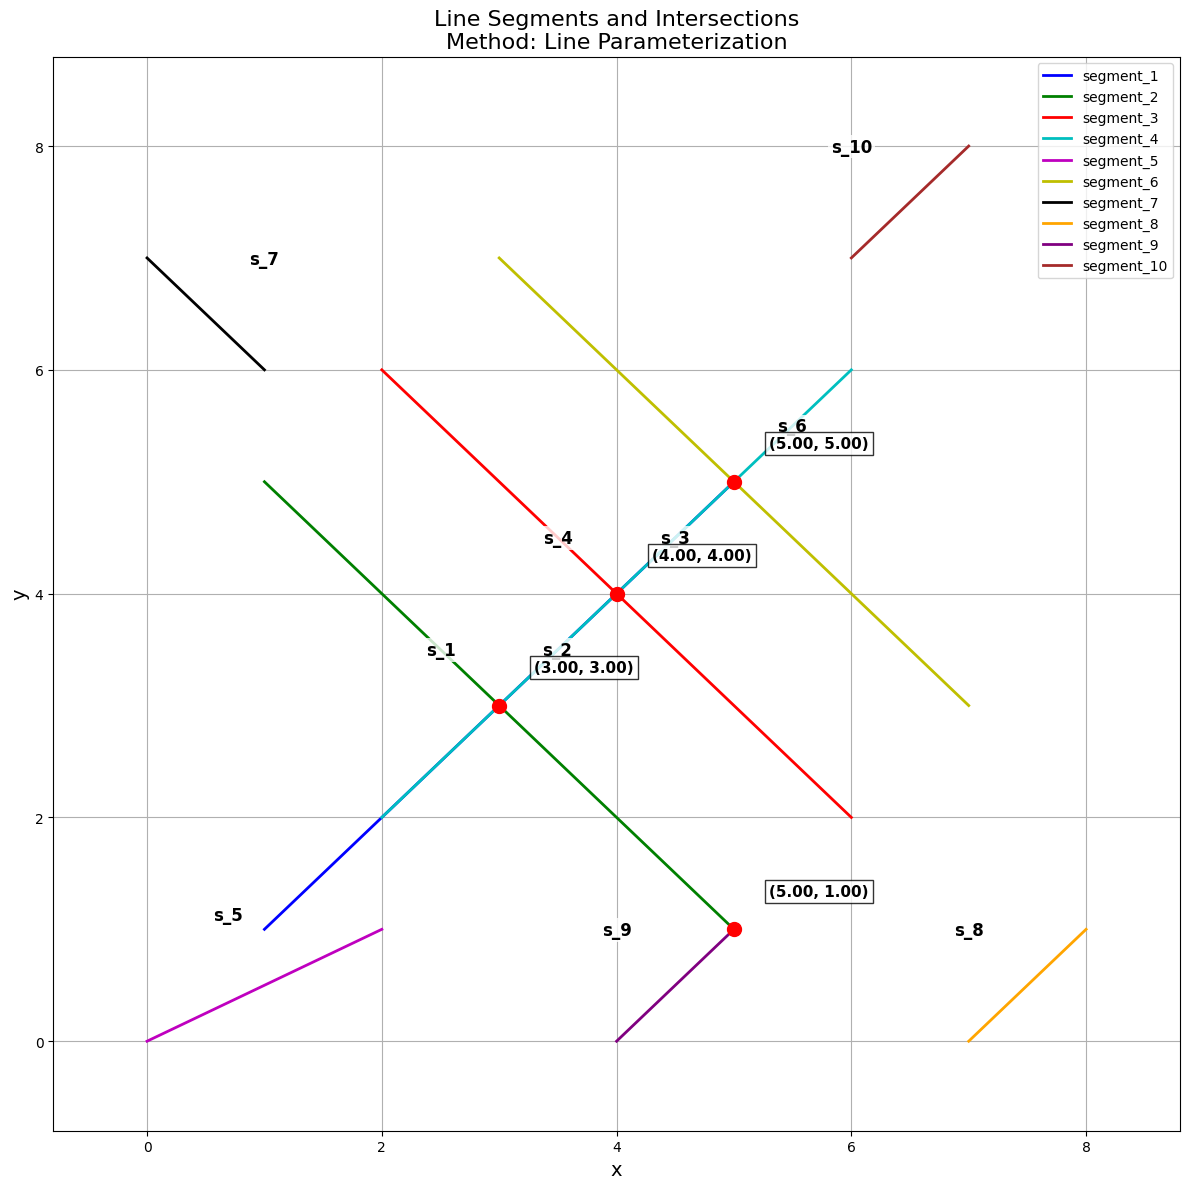


Method B: Cross Product Method
Segments s_1 and s_2 intersect at point (3.00, 3.00)
Segments s_1 and s_3 intersect at point (4.00, 4.00)
Segments s_1 and s_4 intersect at point (5.00, 5.00)
Segments s_1 and s_6 intersect at point (5.00, 5.00)
Segments s_2 and s_4 intersect at point (3.00, 3.00)
Segments s_2 and s_9 intersect at point (5.00, 1.00)
Segments s_3 and s_4 intersect at point (4.00, 4.00)
Segments s_4 and s_6 intersect at point (5.00, 5.00)

RESULTS FOR: Cross Product Method
Found 4 intersection points:
1. Point (4.00, 4.00):
   - Segments s_1 and s_3
   - Segments s_3 and s_4
2. Point (3.00, 3.00):
   - Segments s_1 and s_2
   - Segments s_2 and s_4
3. Point (5.00, 1.00):
   - Segments s_2 and s_9
4. Point (5.00, 5.00):
   - Segments s_1 and s_6
   - Segments s_4 and s_6


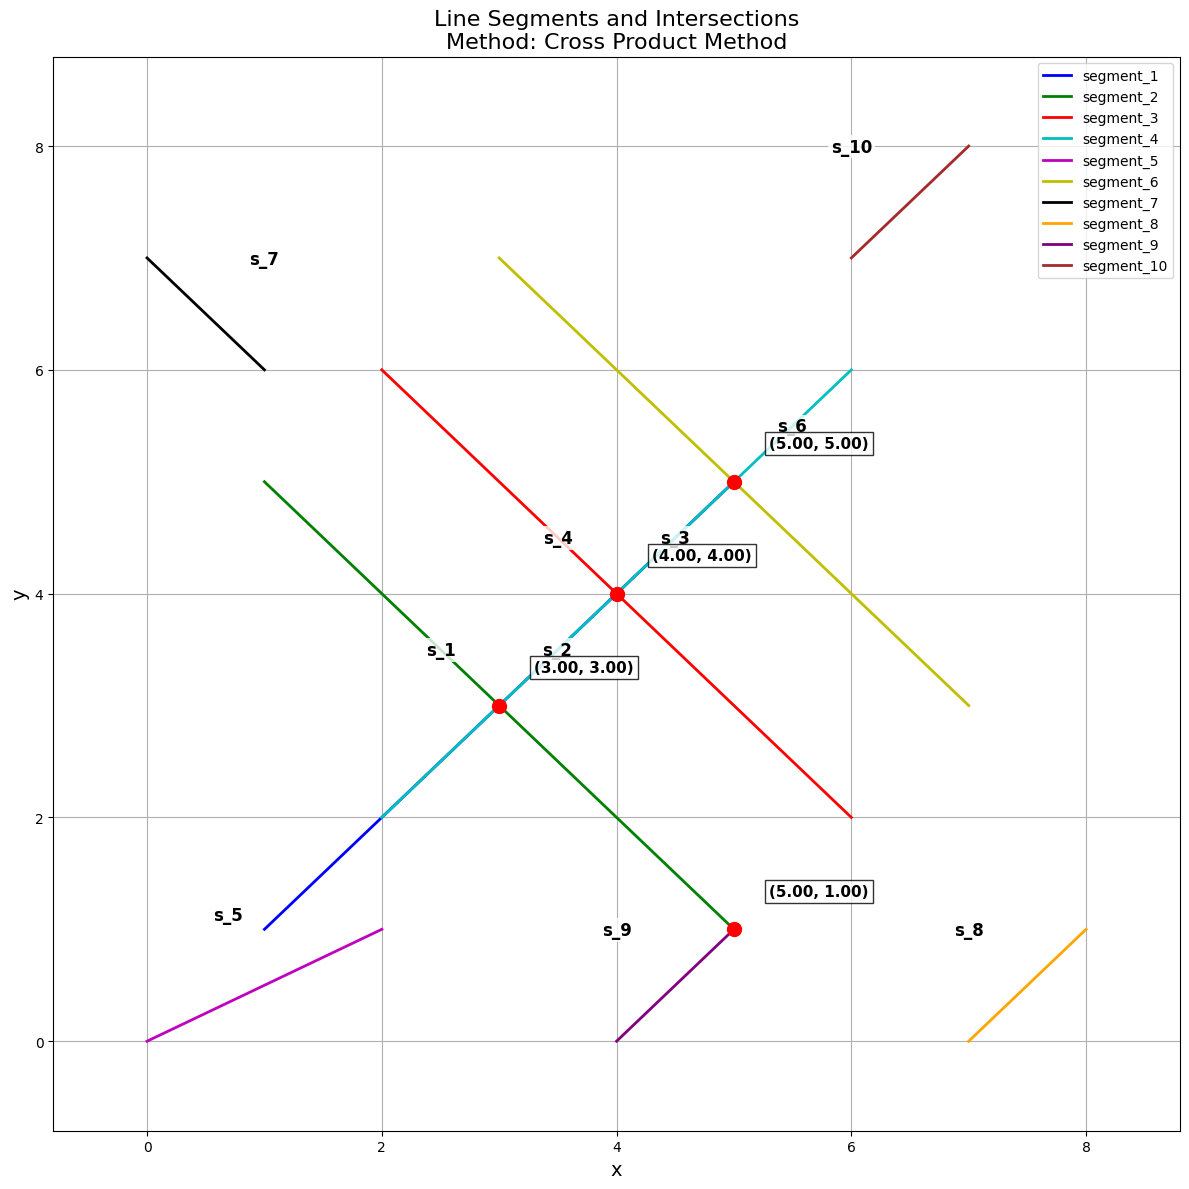


Method C: Bentley-Ottmann Sweep Line Algorithm
Segments s_2 and s_1 intersect at point (3.00, 3.00)
Segments s_3 and s_1 intersect at point (4.00, 4.00)
Segments s_6 and s_1 intersect at point (5.00, 5.00)
Segments s_9 and s_2 intersect at point (5.00, 1.00)

RESULTS FOR: Bentley-Ottmann Algorithm
Found 4 intersection points:
1. Point (3.00, 3.00):
   - Segments s_1 and s_2
   - Segments s_2 and s_4
2. Point (4.00, 4.00):
   - Segments s_1 and s_3
   - Segments s_3 and s_4
3. Point (5.00, 5.00):
   - Segments s_1 and s_6
   - Segments s_4 and s_6
4. Point (5.00, 1.00):
   - Segments s_2 and s_9


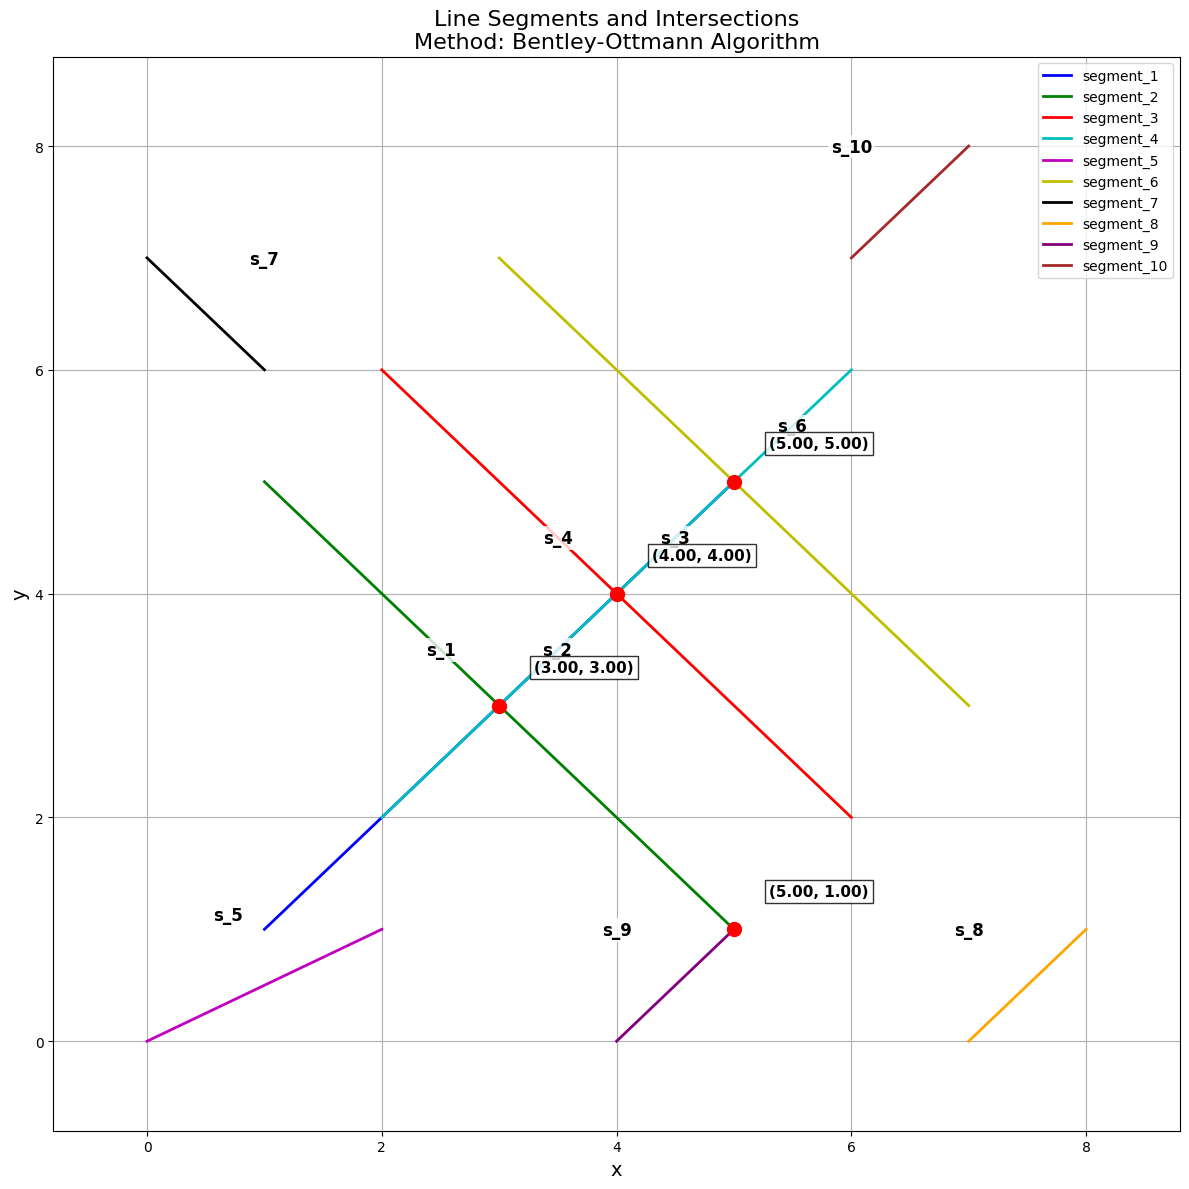

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

COLORS = ['b-', 'g-', 'r-', 'c-', 'm-', 'y-', 'k-', 'orange', 'purple', 'brown']

# segments = [
#     [(0, 1), (5, 5)],      # s1
#     [(1, 8), (7, 1)],      # s2
#     [(2, 8), (6, 2)],      # s3
#     [(2, 2), (9, 6)],      # s4
#     [(0, 4), (4, 8)],      # s5
# ]

segments = [
    [(1, 1), (5, 5)],      # s1 (intersects s2 at (3, 3))
    [(1, 5), (5, 1)],      # s2 (intersects s1)
    [(2, 6), (6, 2)],      # s3 (intersects s4 at (4, 4))
    [(2, 2), (6, 6)],      # s4 (intersects s3)
    [(0, 0), (2, 1)],      # s5 (no intersections)
    [(3, 7), (7, 3)],      # s6 (no intersections)
    [(0, 7), (1, 6)],      # s7 (no intersections)
    [(7, 0), (8, 1)],      # s8 (no intersections)
    [(4, 0), (5, 1)],      # s9 (no intersections)
    [(6, 7), (7, 8)]       # s10 (no intersections)
]

def plot_segments_and_intersections(line_segments, intersection_points, method_name):
    plt.figure(figsize=(12, 12))
    
    x_values = [p[0] for segment in line_segments for p in segment]
    y_values = [p[1] for segment in line_segments for p in segment]
    x_min, x_max = min(x_values), max(x_values)
    y_min, y_max = min(y_values), max(y_values)
    
    padding = max((x_max - x_min), (y_max - y_min)) * 0.1
    plt.xlim(x_min - padding, x_max + padding)
    plt.ylim(y_min - padding, y_max + padding)
    
    for i, segment in enumerate(line_segments):
        (x1, y1), (x2, y2) = segment
        plt.plot([x1, x2], [y1, y2], COLORS[i % len(COLORS)], linewidth=2, 
                 label=f'segment_{i+1}')
        
        dx, dy = x2 - x1, y2 - y1
        angle = np.arctan2(dy, dx)
        offset_x = -0.7 * np.sin(angle)
        offset_y = 0.7 * np.cos(angle)
        
        mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2
        plt.text(mid_x + offset_x, mid_y + offset_y, f's_{i+1}', 
                 fontsize=12, fontweight='bold', 
                 bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2),
                 ha='center', va='center')
    
    for i, point in enumerate(intersection_points):
        plt.plot(point[0], point[1], 'ro', markersize=10, zorder=10)
        
        plt.text(point[0] + 0.3, point[1] + 0.3, 
                 f'({point[0]:.2f}, {point[1]:.2f})', 
                 fontsize=11, fontweight='bold', 
                 bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', pad=3),
                 zorder=11)
    
    plt.grid(True)
    plt.title(f'Line Segments and Intersections\nMethod: {method_name}', fontsize=16)
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

def summarize_results(method_name, intersection_points):
    print(f"\n{'='*50}")
    print(f"RESULTS FOR: {method_name}")
    print(f"{'='*50}")
    
    if not intersection_points:
        print("No intersections found.")
        return
    
    print(f"Found {len(intersection_points)} intersection points:")
    
    point_to_segments = defaultdict(list)
    
    for i in range(len(segments)):
        for j in range(i+1, len(segments)):
            intersection = find_intersection(segments[i], segments[j])
            if intersection:
                # округляем для лучшей точности
                rounded_intersection = (round(intersection[0], 5), round(intersection[1], 5))
                point_to_segments[rounded_intersection].append((i+1, j+1))
    
    for i, point in enumerate(intersection_points):
        rounded_point = (round(point[0], 5), round(point[1], 5))
        segment_pairs = point_to_segments.get(rounded_point, [])
        
        print(f"{i+1}. Point ({point[0]:.2f}, {point[1]:.2f}):")
        for pair in segment_pairs:
            print(f"   - Segments s_{pair[0]} and s_{pair[1]}")

# ЗАДАНИЕ A: ПАРАМЕТРИЗАЦИЯ ПРЯМОЙ 
def find_intersection(segment1, segment2):
    (x1, y1), (x2, y2) = segment1
    (x3, y3), (x4, y4) = segment2
    
    delta_x1, delta_y1 = x2 - x1, y2 - y1
    delta_x2, delta_y2 = x4 - x3, y4 - y3
    
    determinant = delta_x1 * delta_y2 - delta_y1 * delta_x2
    
    if abs(determinant) < 1e-10:
        return None
    
    # первый отрезок: p1 + t*(p2-p1) (t от 0 до 1)
    # второй отрезок: p3 + s*(p4-p3) (t от 0 до 1)
    t = ((x3 - x1) * delta_y2 - (y3 - y1) * delta_x2) / determinant
    s = ((x3 - x1) * delta_y1 - (y3 - y1) * delta_x1) / determinant
    
    if 0 <= t <= 1 and 0 <= s <= 1:
        x = x1 + t * delta_x1
        y = y1 + t * delta_y1
        return (x, y)
    
    return None

def find_all_intersections_parameterization(line_segments):
    """находит все точки пересеения с помощью параметризации прямой"""
    intersection_points = set()
    
    for i in range(len(line_segments)):
        for j in range(i+1, len(line_segments)):
            intersection = find_intersection(line_segments[i], line_segments[j])
            if intersection:
                intersection_points.add(intersection)
                print(f"Segments s_{i+1} and s_{j+1} intersect at point ({intersection[0]:.2f}, {intersection[1]:.2f})")
    
    return intersection_points

#  ЗАДАНИЕ B: CROSS PRODUCT METHOD 
def cross_product(point1, point2, point3):
    """
    > 0 -> слева
    < 0 -> справа
    == 0 -> коллинеарны
    """
    return (point2[0] - point1[0]) * (point3[1] - point1[1]) - (point2[1] - point1[1]) * (point3[0] - point1[0])

def is_point_on_segment(point, segment):
    (x1, y1), (x2, y2) = segment
    
    # проверим что точка на орезке (cross product = 0)
    if abs(cross_product((x1, y1), (x2, y2), point)) > 1e-10:
        return False
    
    # проверим что точка в преедлах отрезка
    if min(x1, x2) <= point[0] <= max(x1, x2) and min(y1, y2) <= point[1] <= max(y1, y2):
        return True
    
    return False

def segments_intersect_cross_product(segment1, segment2):
    (point1, point2) = segment1
    (point3, point4) = segment2
    
    orientation1 = cross_product(point3, point4, point1)
    orientation2 = cross_product(point3, point4, point2)
    orientation3 = cross_product(point1, point2, point3)
    orientation4 = cross_product(point1, point2, point4)
    
    # проверим что отрезки пересекаются
    if ((orientation1 > 0 and orientation2 < 0) or (orientation1 < 0 and orientation2 > 0)) and \
       ((orientation3 > 0 and orientation4 < 0) or (orientation3 < 0 and orientation4 > 0)):
        # найдем точку
        return find_intersection(segment1, segment2)
    
    if abs(orientation1) < 1e-10 and is_point_on_segment(point1, segment2):
        return point1
    if abs(orientation2) < 1e-10 and is_point_on_segment(point2, segment2):
        return point2
    if abs(orientation3) < 1e-10 and is_point_on_segment(point3, segment1):
        return point3
    if abs(orientation4) < 1e-10 and is_point_on_segment(point4, segment1):
        return point4
    
    return None

def find_all_intersections_cross_product(line_segments):
    intersection_points = set()
    
    for i in range(len(line_segments)):
        for j in range(i+1, len(line_segments)):
            intersection = segments_intersect_cross_product(line_segments[i], line_segments[j])
            if intersection:
                intersection_points.add(intersection)
                print(f"Segments s_{i+1} and s_{j+1} intersect at point ({intersection[0]:.2f}, {intersection[1]:.2f})")
    
    return intersection_points

# ЗАДАЧА C: БЕНТИ-ОТТМАН АЛГОРИТМ 
class SweepLineEvent:
    def __init__(self, x_coordinate, event_type, segment_index, point_index):
        self.x_coordinate = x_coordinate
        self.event_type = event_type  # 'start', 'end', or 'intersection'
        self.segment_index = segment_index
        self.point_index = point_index
    
    def __lt__(self, other):
        return self.x_coordinate < other.x_coordinate

def bentley_ottmann_algorithm(line_segments):
    """
    сложность: O((n+k)log n) где n число отрезок, а к количество пересечений.
    """
    events = []
    for i, ((x1, y1), (x2, y2)) in enumerate(line_segments):
        if x1 > x2:
            (x1, y1), (x2, y2) = (x2, y2), (x1, y1)
        
        events.append(SweepLineEvent(x1, 'start', i, 0))
        events.append(SweepLineEvent(x2, 'end', i, 1))
    
    # отсортируем события по х-координате
    events.sort(key=lambda e: (e.x_coordinate, e.event_type != 'end'))
    
    active_segments = [] # текущие сегменты (которые пеересекают заметающую прямую)
    intersection_points = []
    found_intersections = set()
    
    for event in events:
        current_x = event.x_coordinate
        segment_index = event.segment_index
        
        if event.event_type == 'start':
            for active_segment_index in active_segments:
                intersection = find_intersection(
                    line_segments[segment_index], line_segments[active_segment_index]
                )
                # записываем только пересечения справа от заметающей прямой
                if intersection and intersection[0] >= current_x:
                    rounded = (round(intersection[0], 5), round(intersection[1], 5)) # округлили
                    if rounded not in found_intersections: # избегаем дупликатов
                        intersection_points.append(intersection)
                        found_intersections.add(rounded)
                        print(f"Segments s_{segment_index+1} and s_{active_segment_index+1} intersect at point ({intersection[0]:.2f}, {intersection[1]:.2f})")
            
            active_segments.append(segment_index)
        
        elif event.event_type == 'end':
            if segment_index in active_segments:
                active_segments.remove(segment_index)
    
    return intersection_points

segments_copy = [list(segment) for segment in segments]

print("\n" + "="*50)
print("Method A: Line Parameterization")
print("="*50)
intersections_a = find_all_intersections_parameterization(segments_copy)
summarize_results("Line Parameterization", intersections_a)
plot_segments_and_intersections(segments_copy, intersections_a, "Line Parameterization")

print("\n" + "="*50)
print("Method B: Cross Product Method")
print("="*50)
intersections_b = find_all_intersections_cross_product(segments_copy)
summarize_results("Cross Product Method", intersections_b)
plot_segments_and_intersections(segments_copy, intersections_b, "Cross Product Method")

print("\n" + "="*50)
print("Method C: Bentley-Ottmann Sweep Line Algorithm")
print("="*50)
intersections_c = bentley_ottmann_algorithm(segments_copy)
summarize_results("Bentley-Ottmann Algorithm", intersections_c)
plot_segments_and_intersections(segments_copy, intersections_c, "Bentley-Ottmann Algorithm")

Результаты проверки положения точек:
Точка M1(3, 5) находится внутри многоугольника
Точка M2(0, 0) находится на границе многоугольника
Точка M3(2, 0.5) находится на границе многоугольника
Точка M4(10, 6) находится снаружи многоугольника
Точка M5(4, 6) находится внутри многоугольника


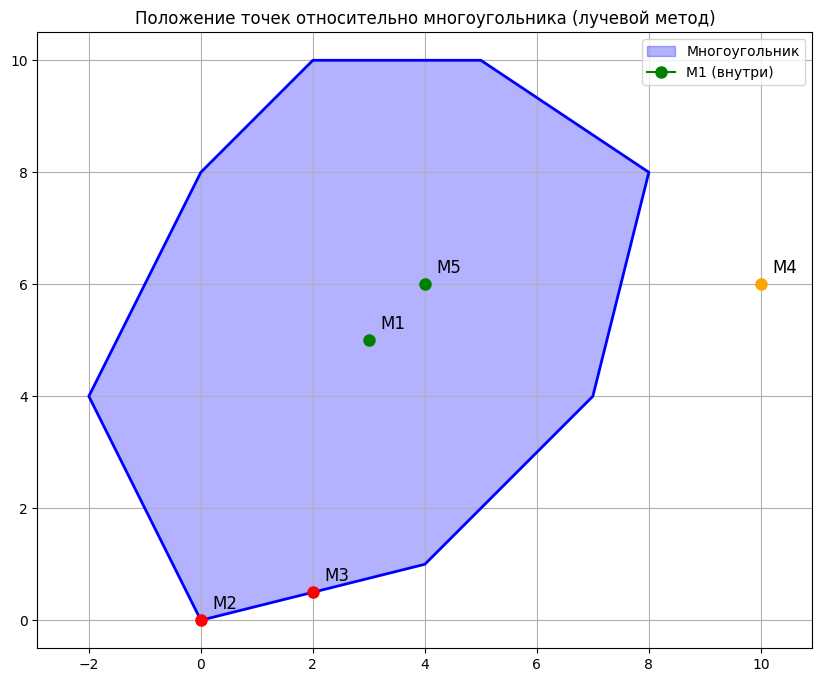

In [4]:
# Задание 2 лучевой метод
import numpy as np
import matplotlib.pyplot as plt

def is_point_on_segment(point, segment_start, segment_end, epsilon=1e-9):
    """Проверяет, лежит ли точка на отрезке."""
    # Проверяем, что точка лежит на линии, содержащей отрезок
    cross_product = (point[1] - segment_start[1]) * (segment_end[0] - segment_start[0]) - \
                   (point[0] - segment_start[0]) * (segment_end[1] - segment_start[1])
    
    if abs(cross_product) > epsilon:
        return False
    
    # Проверяем, что точка находится в диапазоне отрезка
    if segment_start[0] != segment_end[0]:  # Не вертикальная линия
        if segment_start[0] <= point[0] <= segment_end[0] or segment_end[0] <= point[0] <= segment_start[0]:
            return True
    else:  # Вертикальная линия
        if segment_start[1] <= point[1] <= segment_end[1] or segment_end[1] <= point[1] <= segment_start[1]:
            return True
    
    return False

def ray_casting_method(point, vertices):
    """
        -1: точка лежит на границе многоуг
         0: точка находится снаружи многоуг
         1: точка находится внутри многоуг
    """
    n = len(vertices)
    if n < 3:  # Не является многоугольником
        return 0
    
    # Проверяем, лежит ли точка на какой-либо стороне многоуг
    for i in range(n):
        if is_point_on_segment(point, vertices[i], vertices[(i + 1) % n]):
            return -1  # Точка лежит на границе
    
    # Используем горизонтальный луч, идущий из точки вправо
    inside = False
    x, y = point
    
    for i in range(n):
        x1, y1 = vertices[i]
        x2, y2 = vertices[(i + 1) % n]
        
        # Проверяем, пересекает ли луч текущую сторону
        if ((y1 > y) != (y2 > y)) and (x < x1 + (y - y1) * (x2 - x1) / (y2 - y1)):
            inside = not inside
    
    return 1 if inside else 0

def visualize_point_position(polygon_vertices, test_points):
    plt.figure(figsize=(10, 8))
    
    polygon = np.array(polygon_vertices)
    plt.fill(polygon[:, 0], polygon[:, 1], alpha=0.3, color='blue', label='Многоугольник')
    plt.plot(np.append(polygon[:, 0], polygon[0, 0]), 
             np.append(polygon[:, 1], polygon[0, 1]), 'b-', linewidth=2)
    
    for i, point in enumerate(test_points):
        result = ray_casting_method(point, polygon_vertices)
        if result == 1:
            color = 'green'
            status = 'внутри'
        elif result == -1:
            color = 'red'
            status = 'на границе'
        else:
            color = 'orange'
            status = 'снаружи'
        
        plt.plot(point[0], point[1], marker='o', color=color, markersize=8, 
                 label=f'M{i+1} ({status})' if i == 0 else "")
        plt.text(point[0] + 0.2, point[1] + 0.2, f'M{i+1}', fontsize=12)
    
    plt.grid(True)
    plt.axis('equal')
    plt.title('Положение точек относительно многоугольника (лучевой метод)')
    plt.legend()
    plt.show()

polygon_vertices = [
    (0, 0), (4, 1), (7, 4), (8, 8), (5, 10), (2, 10), (0, 8), (-2, 4)
]

test_points = [
    (3, 5),    # Внутри
    (0, 0),    # На границе (вершина)
    (2, 0.5),  # На границе (сторона)
    (10, 6),   # Снаружи
    (4, 6)     # Внутри
]

print("Результаты проверки положения точек:")
for i, point in enumerate(test_points):
    result = ray_casting_method(point, polygon_vertices)
    status = "внутри" if result == 1 else "на границе" if result == -1 else "снаружи"
    print(f"Точка M{i+1}{point} находится {status} многоугольника")

visualize_point_position(polygon_vertices, test_points)

def check_points_positions(polygon_vertices, test_points):
    results = []
    for point in test_points:
        results.append(ray_casting_method(point, polygon_vertices))
    return results